# Ex - 

### Introduction:

This time you will create a data 

Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [1]:
import numpy as np 
import pandas as pd
data = pd.read_csv('NYPD_Motor_Vehicle_Collisions.csv')

/Users/tammy/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

### Step 3. Assign it to a variable called 

In [16]:
#import datetime
data['DATE'] = pd.to_datetime(data['DATE'])
#data = data.drop(data['DATE']>pd.to_datetime('2018-12-31'),axis=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1486226 entries, 2 to 1486227
Data columns (total 29 columns):
DATE                             1486226 non-null datetime64[ns]
TIME                             1486226 non-null object
BOROUGH                          1041432 non-null object
ZIP CODE                         1041257 non-null object
LATITUDE                         1299798 non-null float64
LONGITUDE                        1299798 non-null float64
LOCATION                         1299798 non-null object
ON STREET NAME                   1200761 non-null object
CROSS STREET NAME                1010084 non-null object
OFF STREET NAME                  193312 non-null object
NUMBER OF PERSONS INJURED        1486209 non-null float64
NUMBER OF PERSONS KILLED         1486195 non-null float64
NUMBER OF PEDESTRIANS INJURED    1486226 non-null int64
NUMBER OF PEDESTRIANS KILLED     1486226 non-null int64
NUMBER OF CYCLIST INJURED        1486226 non-null int64
NUMBER OF CYCLIST KILLED

### Step 4. What is the total number of persons injured in the dataset (up to December 31, 2018?)

In [64]:
print(data.loc[data['DATE']<=pd.to_datetime('2018-12-31')]['NUMBER OF PERSONS INJURED'].sum())

368034.0


### Step 5. What proportion of collisions in 2016 resulted in injury or death of a cyclist?

In [59]:
data_2016 = data.loc[pd.DatetimeIndex(data['DATE']).year==2016]
data_2016_b = data_2016.loc[data_2016.BOROUGH == 'BROOKLYN']
print (round(len(data_2016_b)/(len(data_2016)*1.0000000000),10))

0.2065425523


### Step 6. What proportion of all collisions in 2016 occured in Brooklyn? Only consider entries with a non-null value for BOROUGH.

In [60]:
data_2016_c = data_2016.loc[(data_2016['NUMBER OF CYCLIST INJURED']>0) | (data_2016['NUMBER OF CYCLIST KILLED']>0)]
print (round(len(data_2016_c)/(len(data_2016)*1.0000000000),10))

0.0216547426


### Step 7. Obtain the number of vehicles involved in each collision in 2016. Group the collisions by zip code and compute the sum of all vehicles involved in collisions in each zip code, then report the maximum of these values.

In [86]:
zip_agg = data_2016.groupby('ZIP CODE').count().iloc[:,-5:]
zip_agg.sum(axis=1).max()

5703

### Step 8. Do winter driving conditions lead to more multi-car collisions? Compute the rate of multi car collisions as the proportion of the number of collisions involving 3 or more cars to the total number of collisions for each month of 2017. Calculate the chi-square test statistic for testing whether a collision is more likely to involve 3 or more cars in January than in May.

In [184]:
data_2017 = data.loc[pd.DatetimeIndex(data['DATE']).year==2017]

data_2017.set_index(data_2017['DATE'],inplace=True)
data_2017_3plus = data_2017.loc[data_2017['VEHICLE TYPE CODE 3'].notnull()]

data_2017_may=data_2017.loc[data_2017.index.month==pd.to_datetime('2017-05-01').month]
data_2017_jan=data_2017.loc[data_2017.index.month==pd.to_datetime('2017-01-01').month]


data_2017_3plus_may=data_2017_3plus.loc[data_2017_3plus.index.month==pd.to_datetime('2017-05-01').month]
data_2017_3plus_jan=data_2017_3plus.loc[data_2017_3plus.index.month==pd.to_datetime('2017-01-01').month]

import scipy.stats as scs
table = [[len(data_2017_3plus_jan)/(len(data_2017_jan)*1.0000000000),\
          len(data_2017_3plus_may)/(len(data_2017_may)*1.0000000000)],\
          [(len(data_2017_jan)-len(data_2017_3plus_jan))/(len(data_2017_jan)*1.0000000000),\
          (len(data_2017_may)-len(data_2017_3plus_may))/(len(data_2017_may)*1.0000000000)]]##0.353940,0.054064
round(scs.chi2_contingency(table)[0],10)
#scs.chi2_contingency(table)

1.5092938302

### Step 9. 

In [201]:
data_2017_alcohol = data_2017.loc[((data_2017['CONTRIBUTING FACTOR VEHICLE 1'].notnull()) &\
              (data_2017['CONTRIBUTING FACTOR VEHICLE 1'].str.contains('Alcohol'))) | \
                                  ((data_2017['CONTRIBUTING FACTOR VEHICLE 2'].notnull()) &\
              (data_2017['CONTRIBUTING FACTOR VEHICLE 2'].str.contains('Alcohol'))) | \
                                 ((data_2017['CONTRIBUTING FACTOR VEHICLE 3'].notnull()) &\
              (data_2017['CONTRIBUTING FACTOR VEHICLE 3'].str.contains('Alcohol'))) | \
                                 ((data_2017['CONTRIBUTING FACTOR VEHICLE 4'].notnull()) &\
              (data_2017['CONTRIBUTING FACTOR VEHICLE 4'].str.contains('Alcohol')))]

### Step 10. For each borough, compute the number of accidents per capita involving alcohol in 2017. Report the highest rate among the 5 boroughs. Use populations as given by https://en.wikipedia.org/wiki/Demographics_of_New_York_City.

In [220]:
alcohol_perBorgough=data_2017_alcohol.loc[data_2017_alcohol.BOROUGH.notnull()].groupby('BOROUGH').count()['DATE']
pop_table = [1471160,2648771,1664747,2358582,479458]
#alcohol_perBorgough/pop_table
round((alcohol_perBorgough/pop_table).max(),10)

0.0002272752

### Step 11. 

In [255]:
t = data.set_index('DATE').resample('A').count()['TIME']
t18=t[1:-1]
t18.index

DatetimeIndex(['2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31'],
              dtype='datetime64[ns]', name=u'DATE', freq='A-DEC')

### Step 12. 

In [264]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
model = LinearRegression()
scores = []
model.fit(np.array([[i for i in range(2013,2019)]]).reshape(-1, 1), t18[:])
score = model.score(np.array([[i for i in range(2013,2019)]]).reshape(-1, 1), t18[:])
print(score)

0.8944797895310511


### Step 13. 

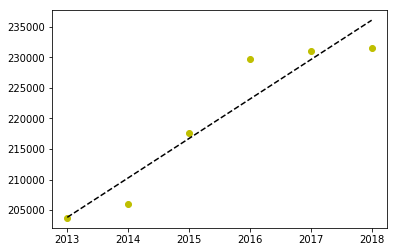

In [266]:
fit = np.polyfit([i for i in range(2013,2019)], t18[:],1)
fit_fn = np.poly1d(fit)
import matplotlib.pyplot as plt
plt.plot([i for i in range(2013,2019)],t18[:], 'yo', [i for i in range(2013,2019)], fit_fn([i for i in range(2013,2019)]), '--k')


### Step 14. Consider the total number of collisions each year from 2013-2018. Is there an apparent trend? Fit a linear regression for the number of collisions per year and report its slope.

In [270]:
from scipy.stats import linregress

round(linregress([i for i in range(2013,2019)], t18[:]).slope,10)

6447.9142857143

### Step 15. 

### Step 16. 

### BONUS: Create your own question and answer it.